In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# 1. Context

In [2]:
data = pd.read_csv('train.csv')  

# 2. Data quality assessment

### 2.1 The overview of the dataset

In [3]:
# to look at a small sample of the dataset at the top
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [4]:
# to look at a small sample of the dataset at the end
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
99995,99995,1,2,"Bell, Adele",female,62.0,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.0,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.0,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.0,0,1,458654,30.92,NaN,S
99999,99999,0,3,"Enciso, Tyler",male,55.0,0,0,458074,13.96,NaN,S


In [5]:
# have a look at a subset of the rows or columns fx: select the first 10 columns
data.iloc[:,:10].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76


In [6]:
# shows the data type for each column, among other things
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [7]:
# shows the data type for each column
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# describe() gives the insights about the data and some useful statistics about the data 
# such as mean, min and max etc.
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


### 2.2 Missing and duplicate value

In [9]:
# dealing with missing values
data.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

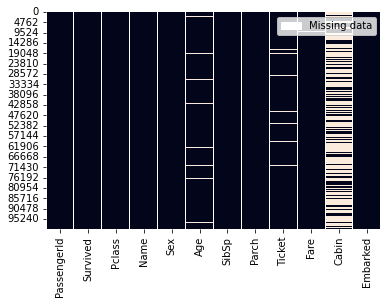

In [10]:
# visualize the location of missing values.
sns.heatmap(data.isnull(), cbar=False)
red_patch = mpatches.Patch(color='white', label='Missing data')
plt.legend(handles=[red_patch])

##### 2.2.1 Age

In [11]:
df_all_corr = data.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
5,Age,Age,1.000000
11,Age,Pclass,0.259109
17,Age,Parch,0.125535
19,Age,SibSp,0.112459
21,Age,Fare,0.109164
24,Age,Survived,0.103895
38,Age,PassengerId,0.002654


Missing values in *Age* are filled with median age, but using median age of the whole data set is not a good choice. Median age of *Pclass* groups is the best choice because of its high correlation with *Age*. It is also more logical to group ages by passenger classes instead of other features.

In order to be more accurate, *Sex* feature is used as the second level of groupby while filling the missing *Age* values. As seen from below, *Pclass* and *Sex* groups have distinct median *Age* values. When passenger class increases, the median age for both males and females also increases. However, females tend to have slightly lower median *Age* than males. The median ages below are used for filling the missing values in *Age* feature.

In [12]:
age_by_pclass_sex = data.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(data['Age'].median()))

# Filling the missing values in Age with the medians of Sex and Pclass groups
data['Age'] = data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 49.0
Median age of Pclass 1 males: 44.0
Median age of Pclass 2 females: 40.0
Median age of Pclass 2 males: 37.0
Median age of Pclass 3 females: 28.0
Median age of Pclass 3 males: 31.0
Median age of all passengers: 39.0


##### 2.2.2 Embarked

In [13]:
# We can check the Embarked median by Pclass.
data.groupby(['Pclass','Embarked'])['Survived'].describe()

count      mean       std  min  25%  50%  75%  max
Pclass Embarked                                                      
1      C         11843.0  0.773959  0.418283  0.0  1.0  1.0  1.0  1.0
       Q          3751.0  0.627299  0.483588  0.0  0.0  1.0  1.0  1.0
       S         14635.0  0.409908  0.491833  0.0  0.0  0.0  1.0  1.0
2      C          6156.0  0.815627  0.387820  0.0  1.0  1.0  1.0  1.0
       Q           844.0  0.654028  0.475966  0.0  0.0  1.0  1.0  1.0
       S         21609.0  0.437040  0.496032  0.0  0.0  0.0  1.0  1.0
3      C          4188.0  0.592646  0.491400  0.0  0.0  1.0  1.0  1.0
       Q           829.0  0.401689  0.490536  0.0  0.0  0.0  1.0  1.0
       S         35895.0  0.203427  0.402553  0.0  0.0  0.0  0.0  1.0

In [14]:
# The median of Embarked in Pclass = 1 is S. Refill the missing Embarked data with S.
data.loc[data['Embarked'].isna(), 'Embarked'] = 'S'

##### 2.2.3 Fare

We can assume that *Fare* is related to family size (*Parch* and *SibSp*) and *Pclass* features. Median *Fare* value of a male with a third class ticket and no family is a logical choice to fill the missing value.

In [15]:
med_fare = data.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]

data['Fare'] = data['Fare'].fillna(med_fare)

##### 2.2.4 Cabin

*Cabin* has 67000+ missing values so it will also be discarded from out analysis and instead we will use a derived variable *cabin_missing*.

In [16]:
data['Cabin_Missing'] = data.Cabin.isnull()*1.0
data.drop(['Cabin'], axis=1, inplace=True)

##### 2.2.5 Ticket / PassengerId

In [17]:
data.drop(['Ticket'], axis=1, inplace=True)
data.drop(['PassengerId'], axis=1, inplace=True)

# 3. Data exploration

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Survived        100000 non-null  int64  
 1   Pclass          100000 non-null  int64  
 2   Name            100000 non-null  object 
 3   Sex             100000 non-null  object 
 4   Age             100000 non-null  float64
 5   SibSp           100000 non-null  int64  
 6   Parch           100000 non-null  int64  
 7   Fare            100000 non-null  float64
 8   Embarked        100000 non-null  object 
 9   Cabin_Missing   100000 non-null  float64
 10  Ticket_Missing  100000 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 8.4+ MB


In [19]:
data.Name = data.Name.astype('category')
data.Sex = data.Sex.astype('category')
data.Embarked = data.Embarked.astype('category')

### 3.1 Target Distribution

42774 of 100000 passengers survived and it is the 42.77% of the training set.
57226 of 100000 passengers didnt survive and it is the 57.23% of the training set.


/Users/mikhaillukashevich/mikhail/programming/ml_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


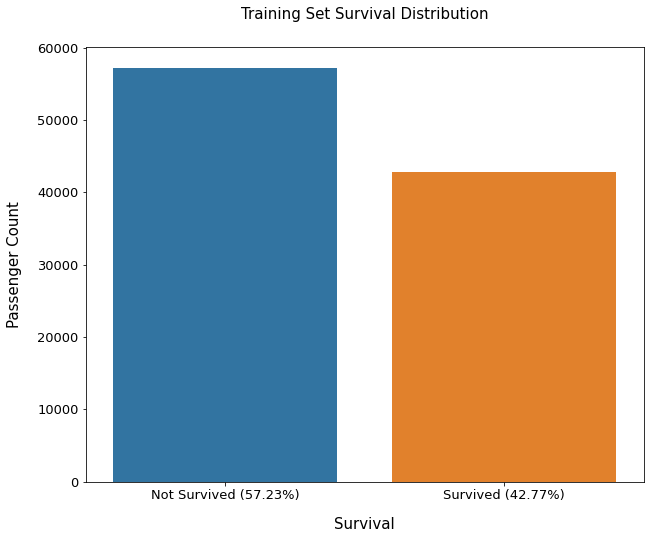

In [20]:
survived = data['Survived'].value_counts()[1]
not_survived = data['Survived'].value_counts()[0]
survived_per = survived / data.shape[0] * 100
not_survived_per = not_survived / data.shape[0] * 100

print('{} of {} passengers survived and it is the {:.2f}% of the training set.'.format(survived, data.shape[0], survived_per))
print('{} of {} passengers didnt survive and it is the {:.2f}% of the training set.'.format(not_survived, data.shape[0], not_survived_per))

plt.figure(figsize=(10, 8))
sns.countplot(data['Survived'])

plt.xlabel('Survival', size=15, labelpad=15)
plt.ylabel('Passenger Count', size=15, labelpad=15)
plt.xticks((0, 1), ['Not Survived ({0:.2f}%)'.format(not_survived_per), 'Survived ({0:.2f}%)'.format(survived_per)])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.title('Training Set Survival Distribution', size=15, y=1.05)

plt.show()

### 3.2 Correlations

A correlation matrix illustrates how variables move together. We see that Pclass has the highest negative correlation with Survived, followed by Parch; Fare is positively correlated.

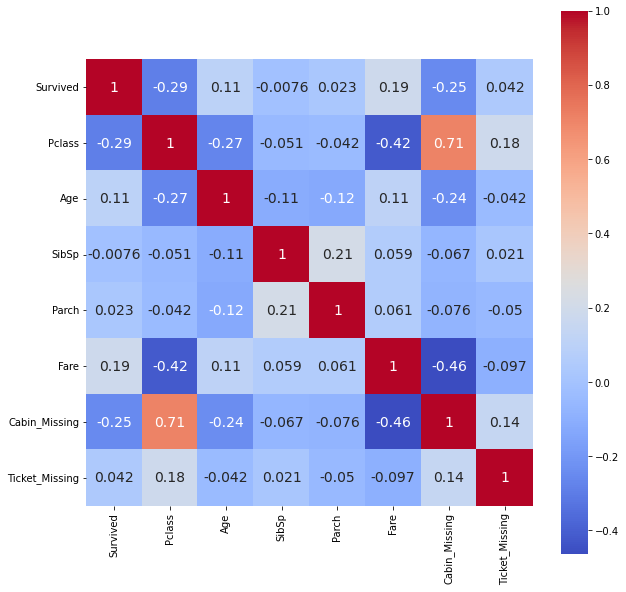

In [21]:
# calculate correlation matrix
fig, axs = plt.subplots(nrows=1, figsize=(10, 10))
sns.heatmap(data.corr(),
            annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
plt.show()

###  3.3 Categorical Features

Every categorical feature has at least one class with high mortality rate. Those classes are very helpful to predict whether the passenger is a survivor or victim. Best categorical features are *Pclass* and *Sex* because they have the most homogenous distributions.

* Passengers boarded from *Southampton* has a lower survival rate unlike other ports. More than half of the passengers boarded from *Cherbourg* had survived. This observation could be related to Pclass feature
* Parch and SibSp features show that passengers with only one family member has a higher survival rate

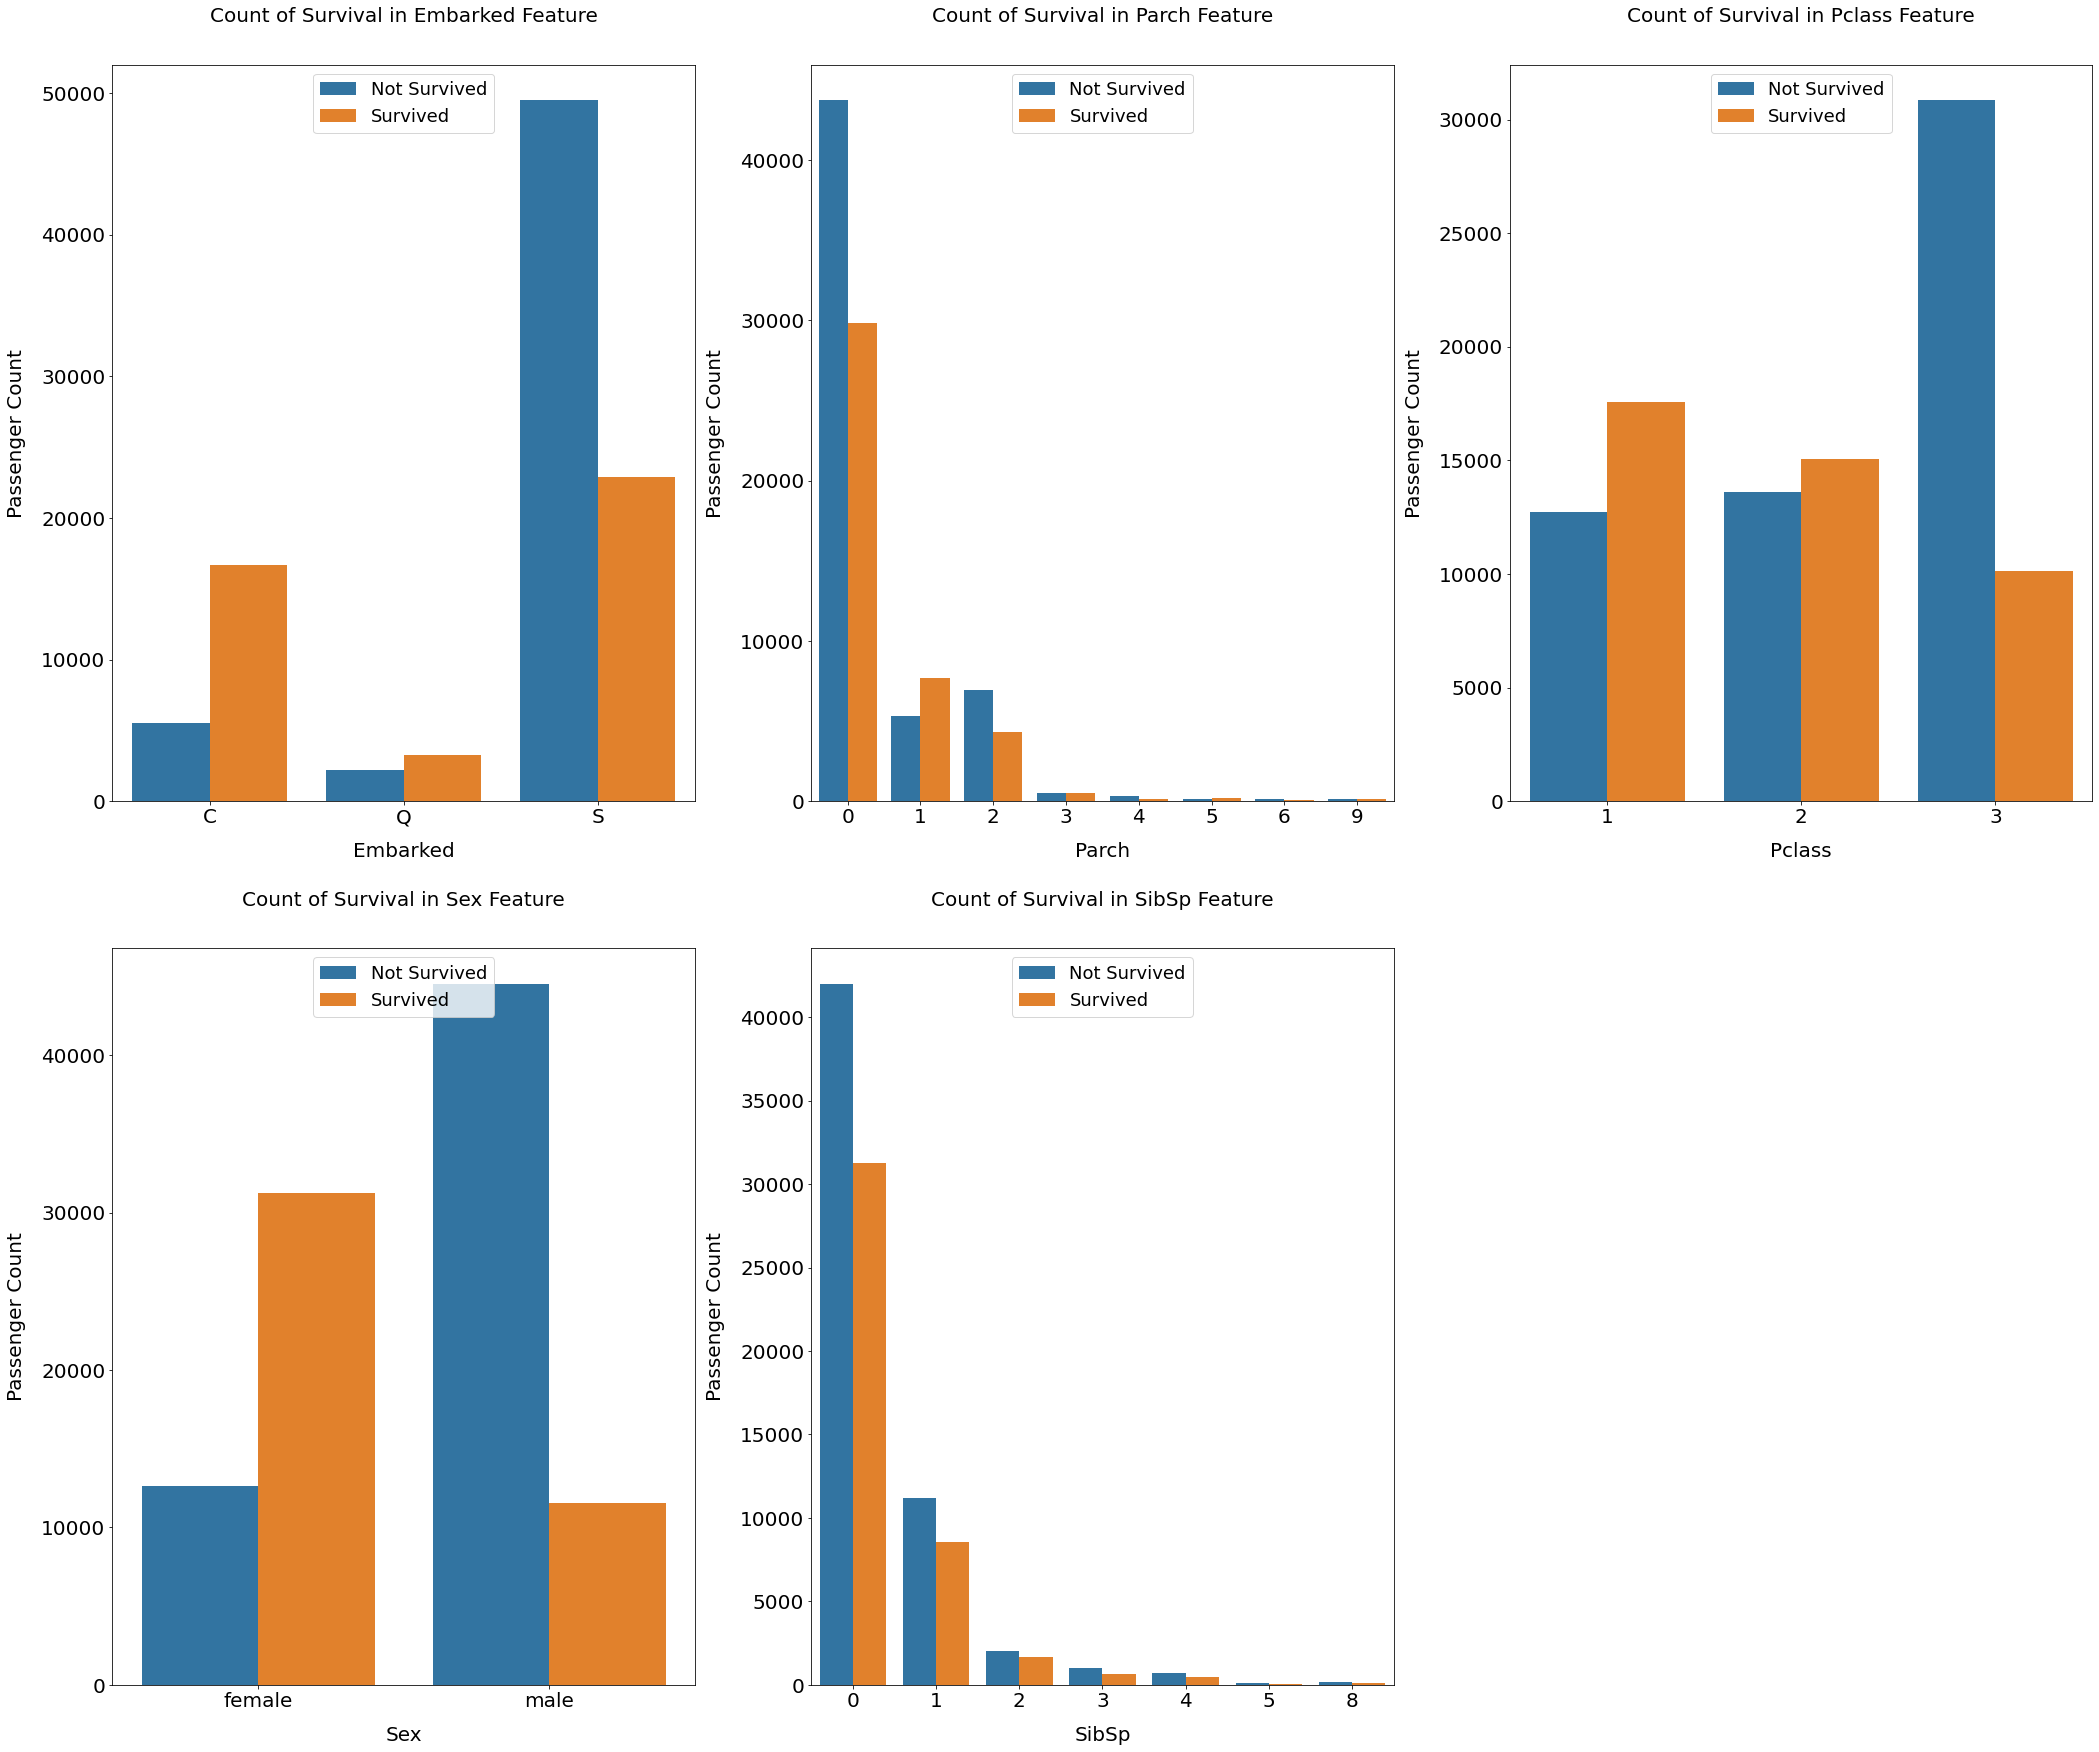

In [28]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=data)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

We can clearly see that male survial rates is around 20% where as female survial rate is about 75% which suggests that gender has a strong relationship with the survival rates.

* There is also a clear relationship between Pclass and the survival by referring to first plot below. Passengers on Pclass1 had a better survial rate of approx 60% whereas passengers on pclass3 had the worst survial rate of approx 22%

* There is also a marginal relationship between the fare and survial rate.

I have quantified the above relationships further in the last statsical modelling section

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

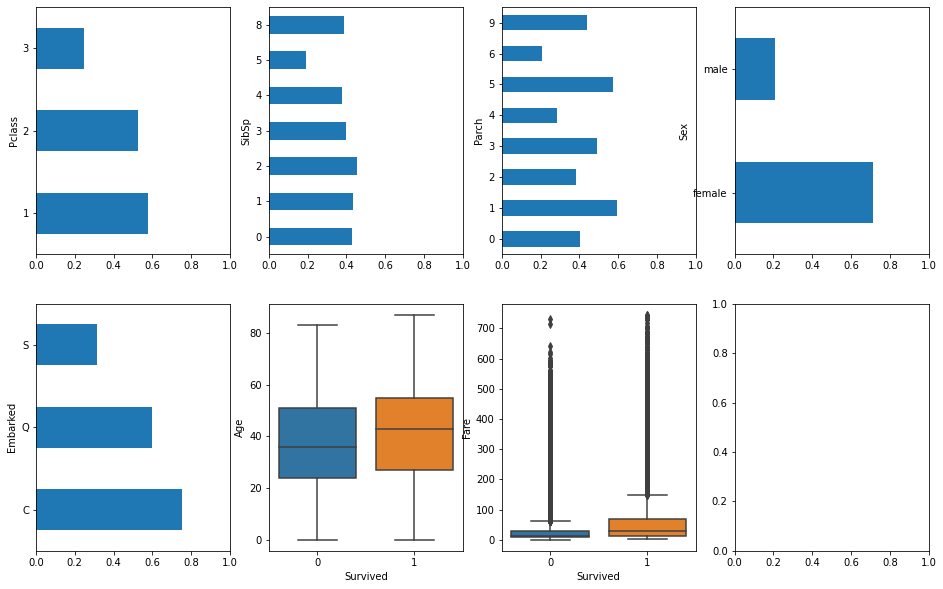

In [38]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
data.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
data.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
data.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
data.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
data.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=data,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=data,ax=axesbi[1,2])

# Summary

In [24]:
data.Name = 

SyntaxError: invalid syntax (<ipython-input-24-cdef2a81eeb9>, line 1)